# Setup

In [60]:
import numpy as num
import scipy.special as scis # scis.gamma(5) --> 24 == 4!
import matplotlib.pyplot as plt
import math # math.exp(), math.sqrt(), math.factorial()
import sympy as sym
import sympy.vector as symvect

sym.init_printing() # Only need to do this once per session.

In [18]:
x,y,x1,y1,x2,y2 = sym.symbols('x y x1 y1 x2 y2')

C is our coordinate system, with basis vectors $\hat{i}$ and $\hat{j}$ (and $\hat{k}$, but we won't use that).

In [74]:
C = symvect.CoordSys3D('') # As long as we restrict ourselves to vectors involving i & j, we'll have 2D vectors.
        # We give the coordinate system no name (''), so we don't get unnecessary subscript clutter on the 
        # basis unit vectors when pretty-printed.

In [75]:
v1 = x1*C.i + y1*C.j  # Symbolic computation.
v2 = x2*C.i + y2*C.j
v1.dot(v2)

In [76]:
v2-v1

# Dot product with side's left normal

Let points $p_1$ and $p_2$ be defined as:
$$
% Each line terminated with "\\"
p_1 = (x_1, y_1) \\
p_2 = (x_2, y_2)
$$

The "left normal" of a vector $\overrightarrow{p_{1}p_{2}}$ from $p_1$ to $p_2$, $(x_{2}, y_{2}) - (x_{1}, y_{1}) = (\Delta x, \Delta y)$, is $(-\Delta y, \Delta x)$.

In [77]:
p1 = x1*C.i + y1*C.j
p2 = x2*C.i + y2*C.j
deltaY = y2-y1
deltaX = x2-x1
leftNormal = -deltaY*C.i + deltaX*C.j
leftNormal

Now we create a vector $\overrightarrow{p_{1}p}$ from $p_1$ to a test point $p$ and take its dot product with $\overrightarrow{p_{1}p_{2}}$:

In [78]:
p = x*C.i + y*C.j
p1p = p - p1
p1p

In [79]:
leftNormal.dot( p1p)

...which is obvious, but I had made the mistake of trying to expand the above expression
by hand and then simplify after cancelling some opposite-sign terms out and factoring.
I think that was doomed to failure.

Anyway, if the above expression is negative, then the test point $p$ is on the opposite side of the line segment $p_{1}p_{2}$ from $p_{1}p_{2}$'s left normal (so... it's on the right).

We see that the totologic blog post has the signs reversed (presumably because
he had the y-axis reversed for typical computer screens).

# Distance from point to side (segment)

We're going to find an expression for $d^2$, the distance $d$ of the test point from the triangle side, squared.

$\overrightarrow{p_{1}p_{2}} \cdot \overrightarrow{p_{1}p} = |\overrightarrow{p_{1}p_{2}}| \times |\overrightarrow{p_{1}p}| \times \cos{\theta}$, where $\theta$ is the angle between the vectors.

In [81]:
p1p2 = p2 - p1
p1p = p - p1
p1p2.dot( p1p)

$|\overrightarrow{p_{1}p}|^2$ is the length of a hypotenuse of a right triangle, squared.

In [85]:
hypSqrd = p1p.magnitude()**2
hypSqrd

One leg of right triangle, the projection of p1p onto p1p2, has length squared equal to

$$
\frac{(\overrightarrow{p_{1}p_{2}} \cdot \overrightarrow{p_{1}p})^2}{|\overrightarrow{p_{1}p_{2}}|^2}
$$

In [86]:
p1p2Sqrd = p1p2.magnitude()**2
p1p2Sqrd

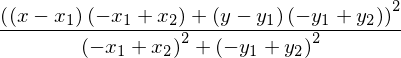

In [87]:
projSqrd = (p1p.dot( p1p2)**2 / p1p2Sqrd)
projSqrd

Length $d$ of remaining leg of triangle is unknown, *but* Pythagoras tells us 

$$
|\overrightarrow{p_{1}p}|^2 - (\overrightarrow{p_{1}p} \cdot \overrightarrow{p_{1}p_{2}})^2 / |\overrightarrow{p_{1}p_{2}}|^2 = d^2
$$

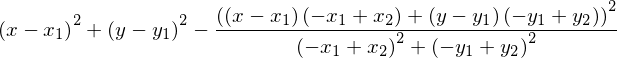

In [88]:
dSqrd = hypSqrd - projSqrd
dSqrd

If we set up a simple test of a vertical line of length 2 (from (0,-1) to (0,1)), and a test point on the
x-axis (y=0) being brought to the y-axis (x -> 0), then the distance of the test point from the line
segment should be exactly x. And it is (don't forget we're calculating distance SQUARED):

In [91]:
dSqrd.subs(x1,0).subs(y1,-1).subs(x2,0).subs(y2,1).subs(y,0)

If our test point is at (1,y) and we're projecting onto a vertical line on the y-axis, it doesn't matter
what our x value is, because only the y value determines what the projection will be. And if y is
larger than the length of our "triangle side" p1p2, then so be it, the projection will also be large.

In [92]:
projSqrd.subs(x1,0).subs(y1,0).subs(x2,0).subs(y2,2).subs(x,1)

In [93]:
projSqrd.subs(x1,0).subs(y1,0).subs(x2,0).subs(y2,2).subs(x,1).subs(y,10)

So, we have to check if the projection is larger than |p1p2|, and, if so, we know that the test vector pp1
is actually LONGER than the triangle side, so we truncate the testing against epsilon^2 by
simply computing the distance from the test point p to p2, the other ("far") end of the triangle side.

That's not described in this document, but it is in the code.